In [1]:
# Importing the packages

import matplotlib.pyplot as plt

import tensorflow as tf

import numpy as np

In [2]:
# importing the mnist dataset from the tensorflow package

# loading the dataset into trin and as test 
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11501568/11490434 [==============================] - 0s 0us/step


In [6]:
# shape of the data
print('Shape of the x train dataframe {0}'.format(x_train.shape))
print('Shape of the x test dataframe {0}'.format(x_test.shape))
print('Shape of the y train dataframe {0}'.format(y_train.shape))
print('Shape of the y test dataframe {0}'.format(y_test.shape))

Shape of the x train dataframe (60000, 28, 28)
Shape of the x test dataframe (10000, 28, 28)
Shape of the y train dataframe (60000,)
Shape of the y test dataframe (10000,)


In [9]:
import pandas as pd

pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

pixcels 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  25 100
  122   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  33 151 208 252 252
  252 146   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  40 152 244 252 253 224 211
  252 232  40   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  15 152 239 252 

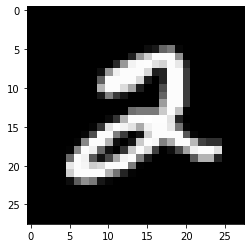

In [17]:
# pick sample image
sample = 5
image = x_train[sample]
print("pixcels \n",image)
print('Checking lenth of the sample image \n',len(image))
# plot the sample
fig = plt.figure
plt.imshow(image,cmap = 'gray') 
plt.show()

In [18]:
# first set 28 x 28 is the number of rows and columns
rows, cols = 28, 28

In [19]:
# reshaping it in to 28 rows and 28 columns and 1 is channel
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

In [20]:
# shape of the data
print('Shape of the x train dataframe {0}'.format(x_train.shape))
print('Shape of the x test dataframe {0}'.format(x_test.shape))


Shape of the x train dataframe (60000, 28, 28, 1)
Shape of the x test dataframe (10000, 28, 28, 1)


In [21]:

#  we normalize x data.
# converting all into float and gray scale 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0


In [22]:
# one hot encoding the y data
# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [23]:
# building the model
def build_lenet(input_shape):
  # sequentail API
  model = tf.keras.Sequential()
  # Convolution #1. Filters as we know, is 6. Filter size is 5 x 5, tanh is the activation function. 28 x 28 is the dimension. 
  model.add(tf.keras.layers.Conv2D(filters=6,
                                   kernel_size=(5, 5),
                                   strides=(1, 1),
                                   activation='tanh',
                                   input_shape=input_shape))
    
  # SubSampling #1. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2),
                                             strides=(2, 2)))
    
  # Convolution #2. Input = 14x14x6. Output = 10x10x16 conv2d
  model.add(tf.keras.layers.Conv2D(filters=16,
                                   kernel_size=(5, 5),
                                   strides=(1, 1),
                                   activation='tanh'))
    
  # SubSampling #2. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
  model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
    
  model.add(tf.keras.layers.Flatten())
  # We must flatten for the further steps to happen. 
  # It is the process of converting all the resultant 2D arrays as single long continuous linear vector


  model.add(tf.keras.layers.Dense(units=120, activation='tanh'))
  #Fully Connected #1. Input = 5x5x16. Output = 120

  model.add(tf.keras.layers.Flatten())
  # Flattening here. It is the process of converting all the resultant 2D arrays as single long continuous linear vector  

  model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
  #Fully Connected #2. Input = 120. Output = 84

  # output layer
  model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
  # Final, output and activation through softmax. 
    
  model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0),
              metrics=['accuracy'])
  # Arguments passed are like the past, nothing to worry!! :) 
 
  return model


In [24]:
input_shape = (rows, cols, 1)

# getting the architecture 
lenet = build_lenet(input_shape)
# We built it! 

# number of epochs
epochs = 10
# train the model
history = lenet.fit(x_train, y_train,
                           epochs=epochs,
                           batch_size=128,
                           verbose=1)
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY: ', acc)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


469/469 [==============================] - 20s 41ms/step - loss: 0.4032 - accuracy: 0.8867
Epoch 2/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1699 - accuracy: 0.9491
Epoch 3/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1168 - accuracy: 0.9650
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0911 - accuracy: 0.9729
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0748 - accuracy: 0.9775
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0643 - accuracy: 0.9804
Epoch 7/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0557 - accuracy: 0.9828
Epoch 8/10
469/469 [==============================] - 20s 42ms/step - loss: 0.0496 - accuracy: 0.9850
Epoch 9/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0443 - accuracy: 0.9869
Epoch 10/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0441 - accuracy:

In [27]:
# architecture of lenet
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
# saving the model
lenet.save('/content/gdrive/MyDrive/lenet_model.h5')

# New Section

In [30]:
pwd

'/content'